# M9
***Text_mining***
___

En este sprint abordamos la **minería de textos** y el **análisis de sentimiento**. 

Para ilustrarlo me apoyo en el discurso final de **Charles Chaplin** en su obra maestra **"The Great Dictator"**.

### <u>OBJETIVOS:</u>
+ Realizar minería de textos.
+ Interpretación de los textos.
+ Análisis de los resultados.

### <u>BIBLIOTECAS Y RECURSOS NECESARIOS:</u>

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/angel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/angel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/angel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

En el **<span style="font-size:1em;">EJERCICIO 1</span>**
 tengo que **seleccionar** un **texto** en inglés y **calcular** la **frecuencia de las palabras**. 

Empezamos **importando** el **texto**.

In [2]:
with open('Great Dictator.txt', 'r', encoding='utf-8') as f:
    texto = f.read()

Para trabajar en el análisis de sentimiento, utilizamos la biblioteca **NLTK** (**N**atural **L**anguage **T**ool**k**it) de **Python**. Esta biblioteca nos proporciona una amplia gama de herramientas y recursos para tareas de procesamiento de lenguaje natural. En el siguiente paso, utilizamos el modelo previamente descargado para la tokenización, **'punkt'**. Este modelo nos permite segmentar el texto en unidades más pequeñas, como oraciones o palabras.

También descargamos **'stopwords'**, que es una lista predefinida de NLTK que identifica palabras irrelevantes, como artículos o preposiciones, y las elimina del texto.

Finalmente convertimos el texto en **minúsculas** y eliminamos los **signos de puntuación**.

In [3]:
texto = texto.lower()

texto_sin_puntuacion = texto.translate(str.maketrans('', '', string.punctuation))

texto_sin_puntuacion

'im sorry but i dont want to be an emperor thats not my business i dont want to rule or conquer anyone i should like to help everyone  if possible  jew gentile  black man  white we all want to help one another human beings are like that we want to live by each others happiness  not by each others misery we dont want to hate and despise one another in this world there is room for everyone and the good earth is rich and can provide for everyone the way of life can be free and beautiful but we have lost the way\n\ngreed has poisoned mens souls has barricaded the world with hate has goosestepped us into misery and bloodshed we have developed speed but we have shut ourselves in machinery that gives abundance has left us in want our knowledge has made us cynical our cleverness hard and unkind we think too much and feel too little more than machinery we need humanity more than cleverness we need kindness and gentleness without these qualities life will be violent and all will be lost…\n\nthe 

Para el **preprocesado** del **texto**, es necesario eliminar los signos de puntuación y convertir todas las palabras a minúsculas.

Luego, procedemos a **tokenizar** el texto en palabras, lo que significa dividir el texto en unidades más pequeñas, en este caso, **palabras**.

Posteriormente, eliminamos las stopwords y finalmente contamos cuántas veces se repite cada palabra en el texto

In [4]:
palabras = word_tokenize(texto_sin_puntuacion)

stop_words = set(stopwords.words('english'))  
palabras_filtradas = [word for word in palabras if word not in stop_words]

frecuencia_palabras = Counter(palabras_filtradas)

print("Palabras más frecuentes:")
for palabra, frecuencia in frecuencia_palabras.most_common(10):
    print(f"{palabra}: {frecuencia}")

Palabras más frecuentes:
men: 14
us: 13
world: 8
dont: 7
power: 7
let: 7
want: 6
hate: 6
people: 6
fight: 6


Viendo la lista de las palabras más frecuentes, podemos intuir que el texto se centra en temas relacionados con la humanidad, la lucha contra el poder, y la unidad y la igualdad en la sociedad.

Las tres primeras palabras, **"men"** (hombres, aunque entiendo que en el discurso se refiere a mankind (humanidad), pero era 1940), **"us"** (nosotros) y **"world"** (mundo), nos dan una idea clara del tono y tema del texto. También palabras como **"power"** (poder), **"people"** (gente) y **"want"** (querer) refuerzan esta idea de la importancia de la unidad del pueblo.

Aunque se cuelan algunas palabras que podrían parecer negativas, como **"fight"** (luchar), **"dont"** (no) y **"hate"** (odiar), su interpretación siempre puede depender del contexto y el orden de las palabras. En general, sugieren una narrativa que aborda cuestiones fundamentales de la condición humana, la resistencia contra la opresión y la apelación a la solidaridad y la justicia.

## REPRESENTACIONES GRÁFICAS

#### WORDCLOUD

Este tipo de gráfico tiene como objetivo resumir visualmente la información textual y **resaltar** las **palabras** más **relevantes** o frecuentes en un conjunto de datos de texto.

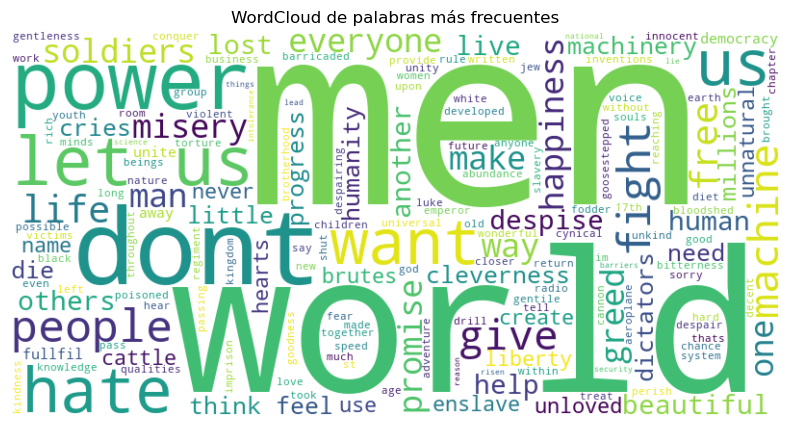

In [5]:
texto = ' '.join(palabras_filtradas)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud de palabras más frecuentes')
plt.axis('off');

Observamos que las palabras más frecuentes en nuestro conjunto se muestran en un tamaño más grande que el resto. Sin embargo, es importante destacar que la frecuencia no es el único factor que se tiene en cuenta. Por ejemplo, la palabra **'men'** es la más repetida, apareciendo 14 veces, seguida por **'us'** con 13 repeticiones. A pesar de esto, 'us' aparece bastante más pequeña que 'men', pero lo hace en dos ocasiones.

El algoritmo utilizado para generar el gráfico no solo considera la frecuencia de las palabras, sino también el contexto y la posición de las mismas, entre otros factores.

#### GRÁFICO DE BARRAS

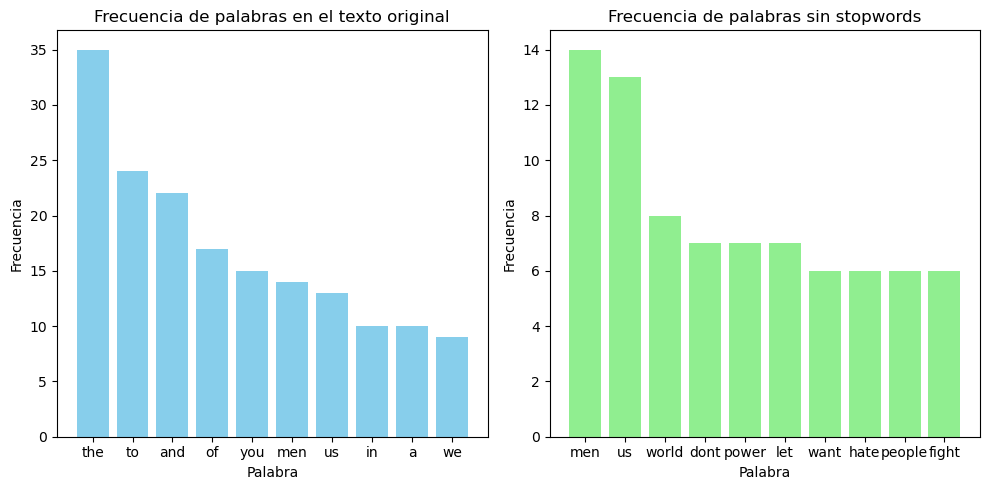

In [6]:
frecuencia_palabras_original = dict(Counter(palabras).most_common(10))

frecuencia_palabras_filtradas = dict(Counter(palabras_filtradas).most_common(10))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(frecuencia_palabras_original.keys(), frecuencia_palabras_original.values(), color='skyblue')
plt.title('Frecuencia de palabras en el texto original')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.bar(frecuencia_palabras_filtradas.keys(), frecuencia_palabras_filtradas.values(), color='lightgreen')
plt.title('Frecuencia de palabras sin stopwords')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')

plt.tight_layout();

En este análisis, comparamos las palabras más frecuentes en el conjunto de datos antes y después de eliminar las **stopwords**. Esto nos permite evaluar la efectividad del proceso de filtrado. Antes de la eliminación, la palabra más repetida es el artículo **"the"** con unas 35 repeticiones. Le siguen **"to"**, **"and"** y **"of"** con entre unas 25 y 17 apariciones en el texto. Esto indica que el filtrado ha funcionado correctamente, ya que ha eliminado palabras que aportan poco valor en términos de sentimiento. 

Sí que se podría cuestionar la eliminación de palabras como **"you"** y **"we"**, que en ciertos contextos sí que podría añadir énfasis o emoción al estar apelando al individuo y a la comunidad.

En el gráfico de la derecha, se muestra la representación gráfica del grupo de palabras más frecuentes tras eliminar las stopwords. Es importante destacar que, aunque ambos gráficos parecen muy similares, la escala de la frecuencia en el conjunto de palabras sin stopwords llega a 14, mientras que en el otro gráfico llega a 35. 

___
En este punto pasamos al **<span style="font-size:1em;">EJERCICIO 2</span>** en el que realizaremos el proceso de  **stemming** al conjunto de datos.

En este paso, aplicamos el proceso de **stemming** a nuestra lista de palabras previamente filtrada, **'palabras_filtradas'**. El stemming es una técnica que busca normalizar las palabras al reducirlas a su raíz o base, eliminando sufijos y prefijos. Esto tiene como objetivo tratar las palabras con significados similares de manera uniforme, lo que facilita el análisis y la comprensión del texto.

Finalmente, almaceno los resultados en un nuevo conjunto de datos llamado **'palabras_stem'**.

In [7]:
stemmer = PorterStemmer()
palabras_stem = [stemmer.stem(palabra) for palabra in palabras_filtradas]

print("Palabras después de eliminar stopwords y aplicar stemming:")
print(palabras_stem)

Palabras después de eliminar stopwords y aplicar stemming:
['im', 'sorri', 'dont', 'want', 'emperor', 'that', 'busi', 'dont', 'want', 'rule', 'conquer', 'anyon', 'like', 'help', 'everyon', 'possibl', 'jew', 'gentil', 'black', 'man', 'white', 'want', 'help', 'one', 'anoth', 'human', 'be', 'like', 'want', 'live', 'other', 'happi', 'other', 'miseri', 'dont', 'want', 'hate', 'despis', 'one', 'anoth', 'world', 'room', 'everyon', 'good', 'earth', 'rich', 'provid', 'everyon', 'way', 'life', 'free', 'beauti', 'lost', 'way', 'greed', 'poison', 'men', 'soul', 'barricad', 'world', 'hate', 'goosestep', 'us', 'miseri', 'bloodsh', 'develop', 'speed', 'shut', 'machineri', 'give', 'abund', 'left', 'us', 'want', 'knowledg', 'made', 'us', 'cynic', 'clever', 'hard', 'unkind', 'think', 'much', 'feel', 'littl', 'machineri', 'need', 'human', 'clever', 'need', 'kind', 'gentl', 'without', 'qualiti', 'life', 'violent', 'lost…', 'aeroplan', 'radio', 'brought', 'us', 'closer', 'togeth', 'natur', 'invent', 'cri',

Al observar la lista de palabras después de aplicar el **stemming**, podemos notar cómo algunas palabras han sido modificadas. Por ejemplo, 'anyon' parece haber sustituido a 'anyone', mientras que 'anoth' probablemente se refiere a 'another'. 

También hay algunas transformaciones curiosas como los casos de 'sorri', 'happi' o 'busi. Aunque no parece haber una razón clara para estas transformaciones, podríamos considerarlas parte del proceso intrínseco del algoritmo de stemming.

## REPRESENTACIÓN GRÁFICA

Buscamos un gráfico que pueda representar esta transformación. Para ello **comparamos** algunas **palabras antes y después** del proceso. Usamos la lista de palabras filtradas en la que solo faltan las **stopwords**. 

Inicialmente, intentamos comparar todos los pares de palabras antes y después del stemming, pero la alta cantidad resultó en una visualización ilegible. Por lo tanto, optamos por seleccionar solo las palabras más frecuentes.

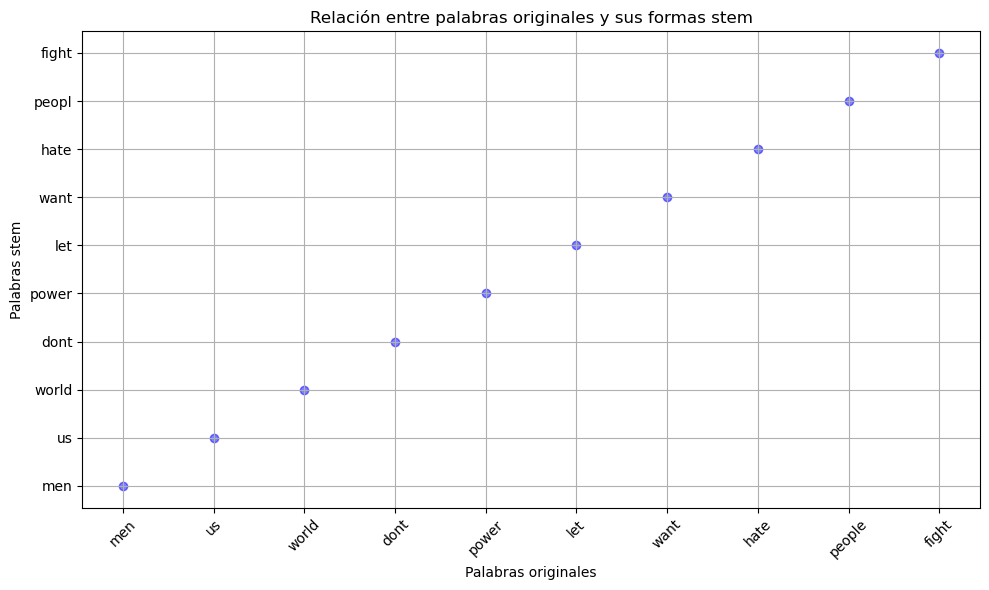

In [8]:
palabras_frecuentes = list(frecuencia_palabras_filtradas.keys())[:10]  
palabras_stem_correspondientes = [stemmer.stem(palabra) for palabra in palabras_frecuentes]

plt.figure(figsize=(10, 6))
plt.scatter(palabras_frecuentes, palabras_stem_correspondientes, color='blue', alpha=0.5)
plt.title('Relación entre palabras originales y sus formas stem')
plt.xlabel('Palabras originales')
plt.ylabel('Palabras stem')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout();

De todo este conjunto solo se aprecia una transformación, pero sirve para ilustrar como funciona el proceso. En este caso, el algoritmo ha cambiado **"people"** por **"peopl"**. Esta transformación representa cómo el stemming elimina los sufijos de las palabras para reducirlas a su raíz o base
___

Para concluir el sprint, realizamos el **análisis de sentimiento** en el conjunto de datos obtenidos. **<span style="font-size:1em;">EJERCICIO 3</span>**   

En este punto, tenemos el texto en minúsculas, sin signos de puntuación, libre de palabras irrelevantes para el análisis como las preposiciones y en su forma base o raíz. Estos datos se almacenan en la lista **'palabras_stem'**, que necesitamos convertir en cadena de texto para que **SentimentIntensityAnalyzer** pueda funcionar correctamente.

In [9]:
sid = SentimentIntensityAnalyzer()

texto_procesado = " ".join(palabras_stem)

sentiment_scores = sid.polarity_scores(texto_procesado)

print(sentiment_scores)

{'neg': 0.169, 'neu': 0.625, 'pos': 0.207, 'compound': 0.9512}


In [10]:
score = sentiment_scores['compound']

if score >= 0.05:
    classification = "Positivo"
elif score <= -0.05:
    classification = "Negativo"
else:
    classification = "Neutro"

print(f'\nPuntuación del sentimiento: {score}')
print(f'Clasificación de sentimiento: {classification}')


Puntuación del sentimiento: 0.9512
Clasificación de sentimiento: Positivo


Todas las métricas indican una fuerte inclinación positiva en el texto. Al observar los **'sentiment_scores'**, se aprecia que entre las categorías de sentimiento **negativo**, **neutral** y **positivo**, la mayoría de los resultados caen en la categoría neutral, alcanzando el **64.3%** de los datos. Le siguen los considerados positivos, con un **23.4%** y finalmente, los negativos, que representan el **12.3%**. 

Esto podría sugerir una puntuación más moderada en el **sentimiento** y en **compound**, sin embargo el análisis tiene en cuenta otros factores como la **intensidad emocional**, el **contexto** y la **combinación de las palabras**.

## REPRESENTACIONES GRÁFICAS

#### PIECHART

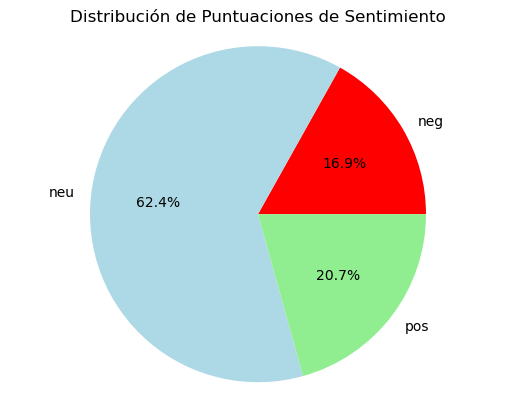

In [12]:
filtered_scores = {key: value for key, value in sentiment_scores.items() if key in ['neu', 'pos', 'neg']}

labels = filtered_scores.keys()
sizes = filtered_scores.values()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['red', 'lightblue', 'lightgreen'])
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.axis('equal');

En este gráfico de sectores, representamos la proporción de sentimientos dentro del texto (en **'filtered_scores'** excluyo 'compound' al ser una medida compuesta). 

Casi dos terceras partes son palabras calificadas como neutras, y en el otro tercio, las valoradas como positivas casi doblan las negativas.

___

## REPRESENTACIÓN DE LOS SENTIMIENTOS A LO LARGO DEL TEXTO
#### SCATTERPLOT

Tras realizar los tres ejercicios, me intrigó la posibilidad de detectar patrones en la distribución de sentimientos a lo largo del discurso. Comprobar si hay tramos en los que el texto se inclina hacia un tono más positivo o hacia uno más negativo.

Para lograrlo, vuelvo a usar **SentimentIntensityAnalyzer()**, pero en este caso para aplicarlo a cada palabra individualmente en lugar de evaluar todo el texto en conjunto. Este enfoque permite asignar un sentimiento específico a cada palabra, brindando una visión detallada de cómo varía el tono a lo largo del texto.

In [13]:
analyzer = SentimentIntensityAnalyzer()

palabras_sentimiento = []

for palabra in palabras:
    puntaje = analyzer.polarity_scores(palabra)
    
    if puntaje['compound'] >= 0.05:
        sentimiento = 'pos'
    elif puntaje['compound'] <= -0.05:
        sentimiento = 'neg'
    else:
        sentimiento = 'neu'

    palabras_sentimiento.append((palabra, sentimiento))

for palabra, sentimiento in palabras_sentimiento:

    print(f"{palabra}: {{{sentimiento}}}", end=" ")

im: {neu} sorry: {neg} but: {neu} i: {neu} dont: {neu} want: {pos} to: {neu} be: {neu} an: {neu} emperor: {neu} thats: {neu} not: {neu} my: {neu} business: {neu} i: {neu} dont: {neu} want: {pos} to: {neu} rule: {neu} or: {neu} conquer: {neu} anyone: {neu} i: {neu} should: {neu} like: {pos} to: {neu} help: {pos} everyone: {neu} if: {neu} possible: {neu} jew: {neu} gentile: {neu} black: {neu} man: {neu} white: {neu} we: {neu} all: {neu} want: {pos} to: {neu} help: {pos} one: {neu} another: {neu} human: {neu} beings: {neu} are: {neu} like: {pos} that: {neu} we: {neu} want: {pos} to: {neu} live: {neu} by: {neu} each: {neu} others: {neu} happiness: {pos} not: {neu} by: {neu} each: {neu} others: {neu} misery: {neg} we: {neu} dont: {neu} want: {pos} to: {neu} hate: {neg} and: {neu} despise: {neg} one: {neu} another: {neu} in: {neu} this: {neu} world: {neu} there: {neu} is: {neu} room: {neu} for: {neu} everyone: {neu} and: {neu} the: {neu} good: {pos} earth: {neu} is: {neu} rich: {pos} and: {n

In [14]:
total_palabras = len(palabras)
print("Número total de palabras:", total_palabras)

Número total de palabras: 618


Obtenemos una lista de 318 palabras con su sentimiento asociado. Es importante destacar que estas palabras se mantienen en el orden original del discurso.

Con esta información podemos visualizar gráficamente la evolución del sentimiento a lo largo del discurso. 

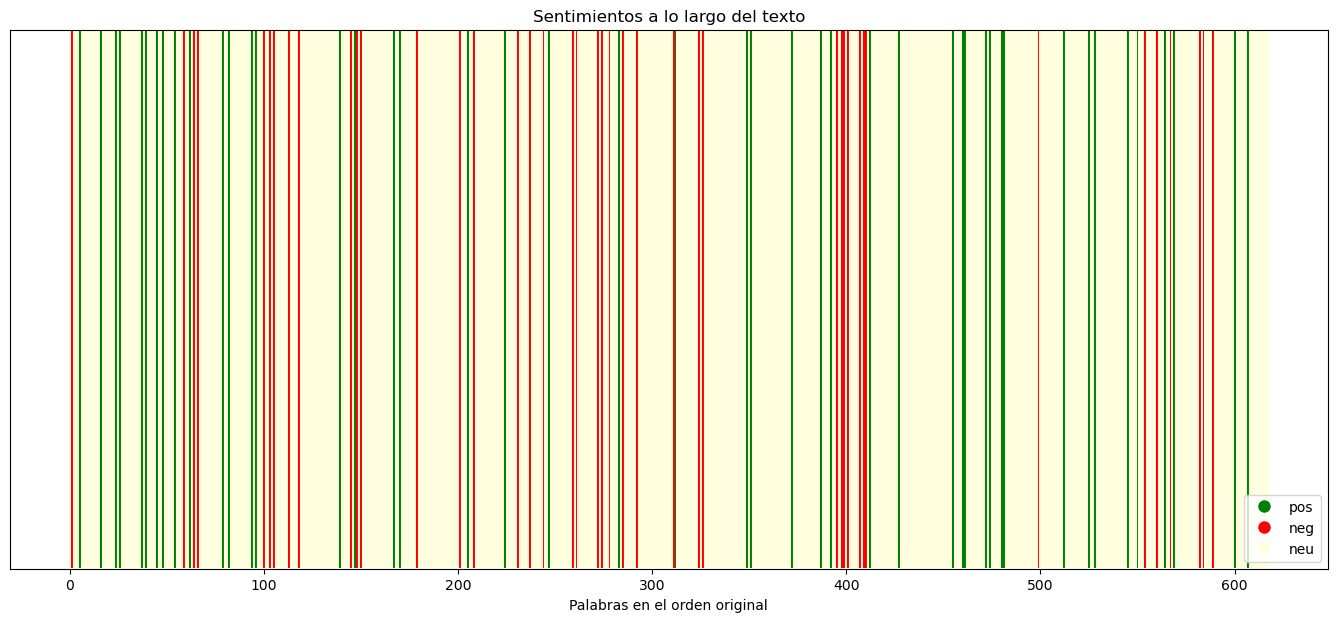

In [15]:
palabras, sentimientos = zip(*palabras_sentimiento)

colores = {'pos': 'green', 'neg': 'red', 'neu': 'lightyellow'}
colores_palabras = [colores[s] for s in sentimientos]

leyenda = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=sentimiento) for sentimiento, color in colores.items()]

plt.figure(figsize=(17, 7))  
tamaño_barras = 150000  

plt.scatter(range(len(palabras)), [0]*len(palabras), c=colores_palabras, marker='|', s=tamaño_barras) 
plt.title('Sentimientos a lo largo del texto')
plt.xlabel('Palabras en el orden original')
plt.yticks([], []);
plt.legend(handles=leyenda, loc='lower right');

El gráfico resultante es una representación visual clara de la distribución de **sentimientos a lo largo del texto**. Las palabras clasificadas como neutrales se muestran en <span style="color:yellow">amarillo</span> pastel, y representa la mayoría de los resultados. Esto crea un fondo uniforme sobre el cual destacan las valoraciones positivas en <span style="color:green">verde</span> y las negativas en <span style="color:red">rojo</span>.

Se **observa** una **tendencia** interesante donde el discurso comienza de manera más positiva y parece evolucionar hacia una tonalidad más negativa hacia el final. Este cambio en la coloración del gráfico puede indicar cambios en el tono o tema del discurso a lo largo del tiempo.

También se aprecia más concentración de palabras neutrales en el centro del discurso. Parece que las palabras que representan una valoración positiva o negativa tiene mayor concentración tanto al principio como al final.

Para obtener este efecto, se utilizó un scatterplot donde los puntos habituales fueron reemplazados por barras verticales, lo que permite una representación más clara de la evolución del sentimiento para cada palabra del texto. 

## CONCLUSIÓN:
### Reflexiones sobre el discurso de Chaplin.

Al analizar el discurso final de Charles Chaplin en "The Great Dictator" a través de técnicas de minería de texto y análisis de sentimientos, podemos obtener una comprensión más profunda de su mensaje y el impacto emocional que buscaba en la audiencia. En este análisis, hemos realizado procesos como la tokenización o el stemming, hemos explorado la frecuencia de las palabras clave, la evolución del sentimiento y también se ha buscado la distribución de los sentimientos a lo largo del texto.

En primer lugar, la frecuencia de palabras ha revelado temas recurrentes relacionados con la humanidad, la lucha contra el poder y la importancia de la unidad y la igualdad en la sociedad. Podemos verlo reflejado en palabras como "men", "us" y "world", que resaltan la importancia de la solidaridad y la resistencia contra la opresión.

En el análisis de sentimientos, hemos visto una inclinación general hacia un tono positivo en el discurso, aunque con una mayoría de palabras clasificadas como neutrales. Sin embargo, la evolución del sentimiento a lo largo del texto muestra una tendencia interesante, con un inicio algo más positivo que evoluciona hacia una tonalidad más negativa hacia el final. Esta progresión podría reflejar el viaje emocional y la intensidad del mensaje de Chaplin, empezando de una manera muy tímida y temerosa y culminando en un tono convincente y seguro llamando a la acción contra la injusticia y la opresión.

En resumen, el discurso de Chaplin en "The Great Dictator" continúa siendo relevante en la actualidad, transmitiendo un mensaje atemporal de esperanza, resistencia y humanidad. A través del análisis de texto y sentimientos, podemos apreciar aún más la profundidad y el impacto emocional de sus palabras, inspirando reflexión y acción en la lucha por un mundo más justo y equitativo.